 # Customer Churn Prediction for GNB Bank

## 1. Business Understanding:

For GNB Bank, understanding and predicting customer churn is critical for several reasons. First and foremost, customer churn impacts the bank's revenue and profitability. Acquiring new customers is more expensive than retaining existing ones, so preventing churn can lead to significant cost savings. Moreover, customer retention contributes to a positive reputation and strengthens the bank's position in the highly competitive financial industry. By leveraging machine learning techniques to predict customer churn, GNB Bank can proactively address the needs of at-risk customers, personalize their banking experience, and develop targeted marketing campaigns to foster long-term customer loyalty.

## a) Introduction:

GNB Bank is a leading financial institution, providing various banking and financial services to its customers. As with any bank, customer retention is crucial for maintaining a strong market presence and sustaining profitability. Identifying customers who are likely to churn is of paramount importance for GNB Bank to implement targeted strategies and retain valuable customers. In this bprojec, we will explore a dataset containing customer information, including demographics, banking behavior, and historical churn data. Our objective is to build a predictive model that can accurately predict customer churn and provide valuable insights to help GNB Bank enhance its customer retention efforts.

## b) Problem statement
GNB Bank is in constant worry of whether the customer will churn or not. This problem has lead to them unable to make stable and precise decision on the customers that visit, additionally to maintain the already present customers. 

## c) Metric of Success
The model will be counted successful if it can predict accurately whether the customer is likely to churn or not based on their historical behavior and demographic information. 

## d) Main Objective
To build a robust customer churn prediction model that will enable GNB Bank to make data-driven decisions, enhance customer satisfaction, and strengthen its market position in the competitive financial industry.

## e) Specific Objective
* Determine factors that have a higer effect on customer churning.
* Build different models to evaluate the best model.

## f) Experimental design
**Exploratory Data Analysis (EDA):** We will explore the dataset to gain insights into customer demographics, banking behavior, and the distribution of churned customers. EDA will help us understand the data and identify patterns that may be indicative of churn.

**Data Preprocessing:** We will handle missing values, encode categorical variables, and perform feature scaling to prepare the data for model training.

**Feature Importance Analysis:** Using SHAP (SHapley Additive exPlanations), we will identify the most important features that influence customer churn for GNB Bank.

**Model Building:** We will train and evaluate two machine learning models - Decision Trees and Random Forests - to predict customer churn accurately.

**Model Evaluation:** The performance of the models will be assessed using various evaluation metrics, such as accuracy, F1 score, precision, recall, and the ROC-AUC curve.

**Interpretation and Recommendations:** We will interpret the model results to identify key factors contributing to customer churn for GNB Bank. Based on the insights gained, we will provide actionable recommendations to the bank on strategies to reduce churn and improve customer retention.

## g) Data Relevance
This project will use the churn modelling dataset. The dataset has 9970 rows, and 11 columns. The dataset has the following information which will give a better and insight of customer churning.

**1.RowNumber:** A sequential number assigned to each row in the dataset.

**2.CustomerId:** A unique identifier for each customer in the bank.

**3.Surname:** The last name of the customer.

**4.CreditScore:** The credit score of the customer, representing their creditworthiness.

**5.Geography:** The geographical location of the customer (e.g., France, Spain, Germany).

**6.Gender:** The gender of the customer (Male or Female).

**7.Age:** The age of the customer.

**8.Tenure:** The number of years the customer has been with the bank.

**9.Balance:** The account balance of the customer.

**10.NumOfProducts:** The number of bank products the customer has purchased.

**11.HasCrCard:** Whether the customer has a credit card (1 if yes, 0 if no).

**12.IsActiveMember:** Whether the customer is an active member (1 if yes, 0 if no).

**13.EstimatedSalary:** The estimated salary of the customer.

**14.Exited:** The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 2. Data Understanding
Explore the data and have its general understanding that is its shape, columns available, is it clean, its relationship using describe function.

##### Import relevant libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
from xgboost import plot_importance

##### Loading the Data

In [119]:
df = pd.read_csv("Churn Modeling_set.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [120]:
df.shape

(10000, 14)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9994 non-null   float64
 7   Tenure           9963 non-null   float64
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9986 non-null   float64
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9999 non-null   float64
 12  EstimatedSalary  9988 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [122]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9996.000000,9994.000000,9963.000000,9998.000000,9986.000000,9998.000000,9999.000000,9988.000000,10000.000000
mean,5000.50000,1.569094e+07,650.530912,38.923354,5.014554,76473.453397,1.530543,0.705441,0.515052,100085.506746,0.203700
std,2886.89568,7.193619e+04,96.669212,10.490050,2.891654,62397.079186,0.581744,0.455867,0.499798,57520.360859,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


##### Observation
* The dataset has missing values.
* The mean age of customers is 39 and the standard deviation is 10.49 this indicates that the age is spread around the mean.
* The Exited column(the target column) is binary 1 and 0 with the mean of 0.203 which is suggesting that 20% of the customer exited
* Each column has a relevant data type as expected

## 3. Data Preparation
- Select relevant data to be used.
- Clean and construct the data
- Intergrate and reformat data

##### Select relevant data
Will drop:
* RowNumber - its an index of each row, it wont be necessary factor for customer churning
* CustomerId and Surname - the two are unique custmers identify, definately this has no effect on whether the customer to churn or not.

In [123]:
# Drop irrelevant columns
data = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

**Clean and construct data**
* Will drop the missing values in these columns: 'CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'. This is because the number of missing values in the columns are minimal, wont affect the dataset.
* For Tenure and NumProducts will replace the missing values with mode this will help have clear understanding of the most years used and most products used with customers.

In [124]:
# Drop rows with missing values in the "CreditScore" and "Geography" columns
data.dropna(subset=['CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'], inplace=True)

# Calculate the mode of the "Tenure" column
tenure_mode = data["Tenure"].mode().values[0]

# Impute the missing values in the "Tenure" column with the mode
data["Tenure"].fillna(tenure_mode, inplace=True)

# Calculate the mode of the "NumOfProducts" column
numofproducts_mode = data["NumOfProducts"].mode().values[0]

# Impute the missing values in the "NumOfProducts" column with the mode
data["NumOfProducts"].fillna(numofproducts_mode, inplace=True)

# Check the updated number of missing values in each column
print(data.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**Checking for duplicates**

In [125]:
data.duplicated().sum()

0

### Exploratory Data Analysis
* We are to explore the impact of the columns on the exited(which is out target vairable).
* Check multicollinearity using the correltaion plot
* Check the relation of the categorical data on the customers churned(Exited).

### Univariate analysis
Whats the distribution of the Extied column

In [126]:
# Find the unique count of the churned
data.Exited.value_counts()

0    7941
1    2029
Name: Exited, dtype: int64

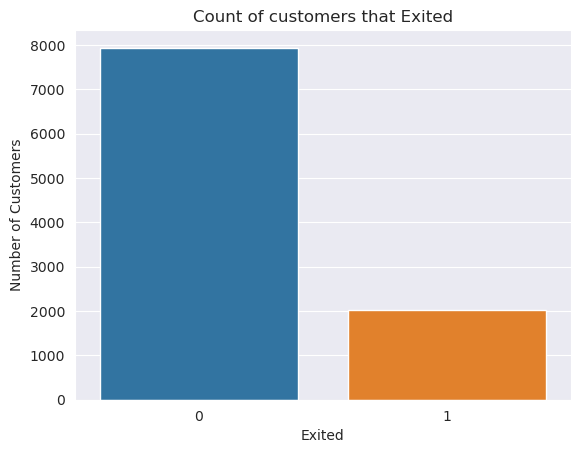

In [127]:
# A bar graph to show the distribution
plt.Figure(figsize=(12,6))
sns.countplot(x='Exited' ,data=data)
plt.ylabel("Number of Customers")
plt.title("Count of customers that Exited")
plt.show()

- Most of the customers dont exit.

**Univariate analysis for numerical columns**

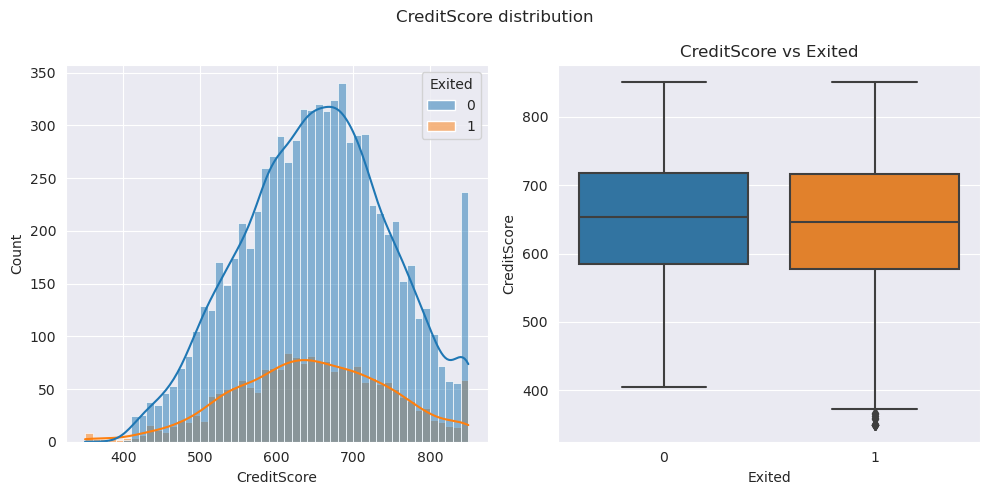

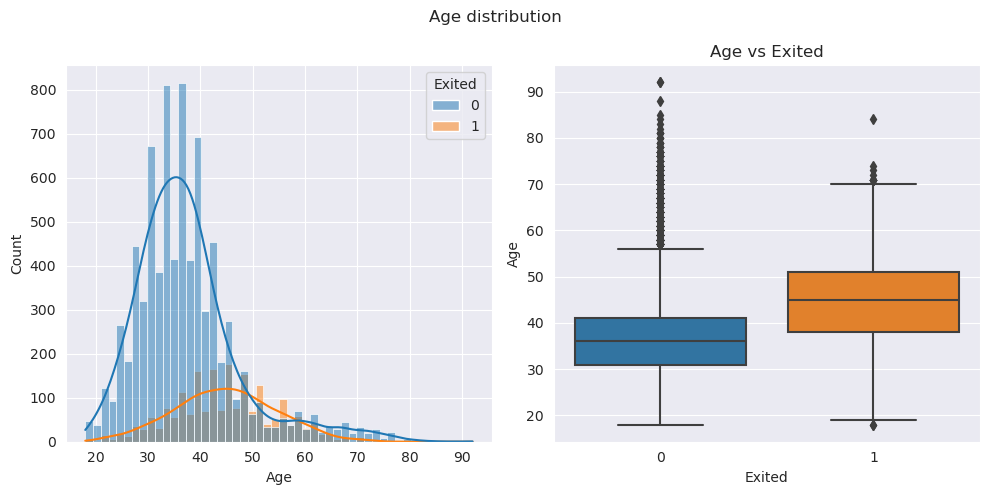

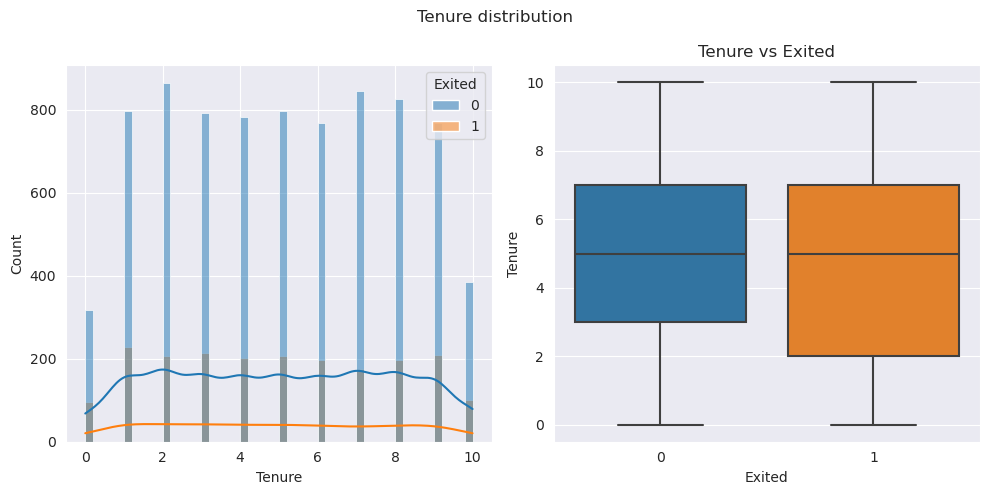

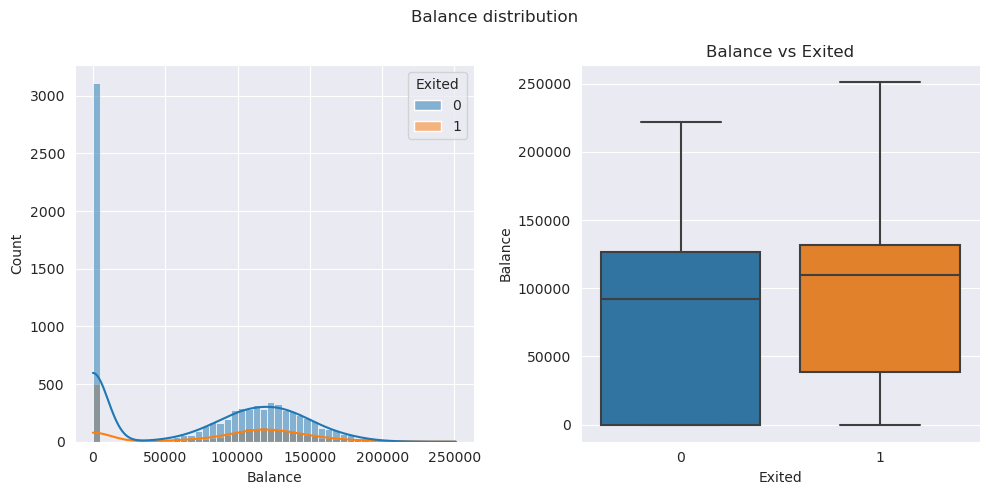

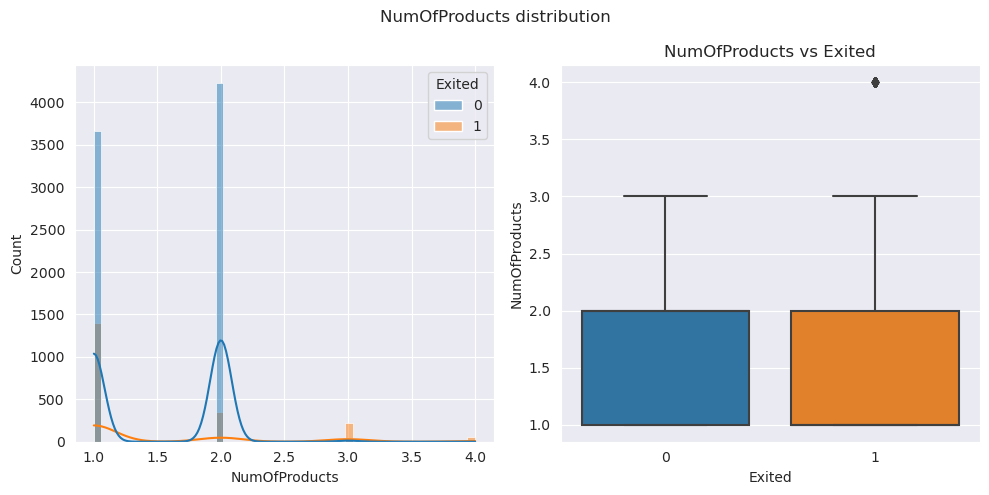

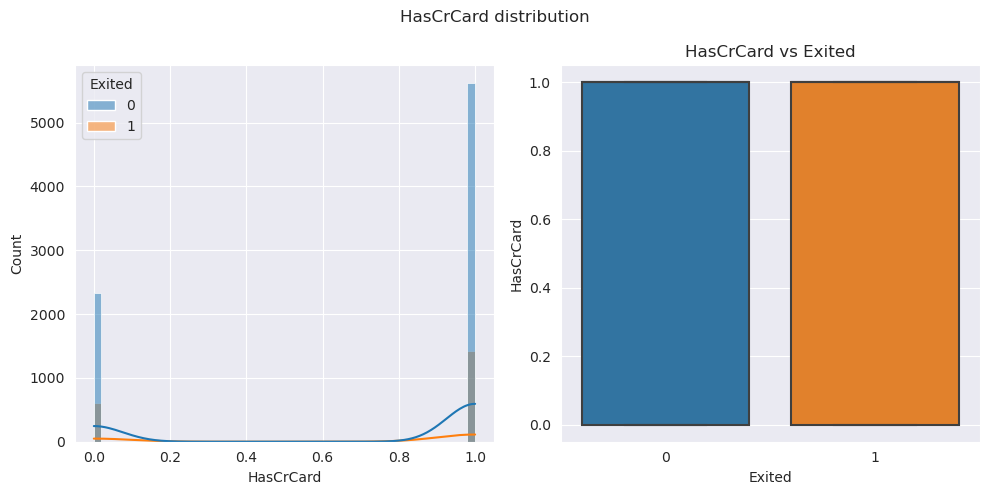

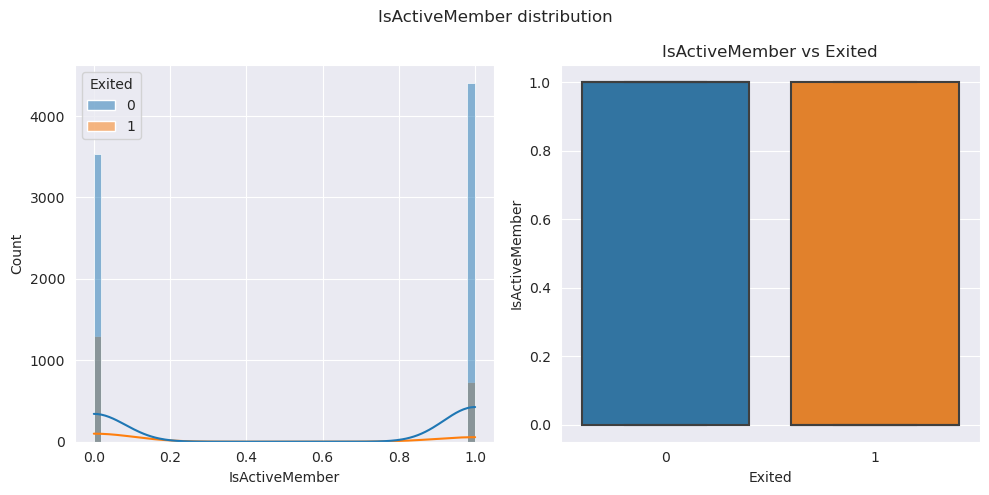

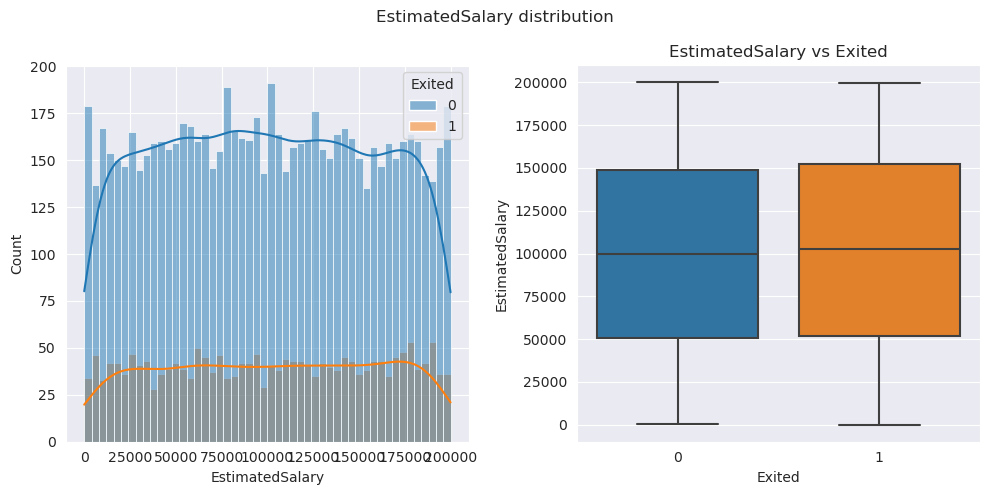

In [128]:
# create a function to run through the dataset and draw count plot with relation to Exited
def draw_count_plot(data, target_variable):

    # We only need numerical columns
    cols = data.select_dtypes(include=['number']).columns.tolist()

    # Loop through the columns
    for col in cols:
        if col != target_variable:
            figsize=(10,5)
           
            fig, axes = plt.subplots(1,2, figsize=figsize)
            
            sns.histplot(data=data, x=data[col], ax=axes[0], hue=data['Exited'], bins=50, kde=True)
            plt.suptitle(f'{col} distribution')
            sns.boxplot(x=data['Exited'], y=data[col], ax=axes[1])
            plt.title(f'{col} vs Exited')
            plt.xlabel('Exited')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
    
draw_count_plot(data, 'Exited')

**Observations**
1. The creditscore has no much difference in the churning.
2. Older customers tend to exit than the younger customers.

Box plot to check for outliers in the categorical columns

**Multivariate analyses for categorical columns**

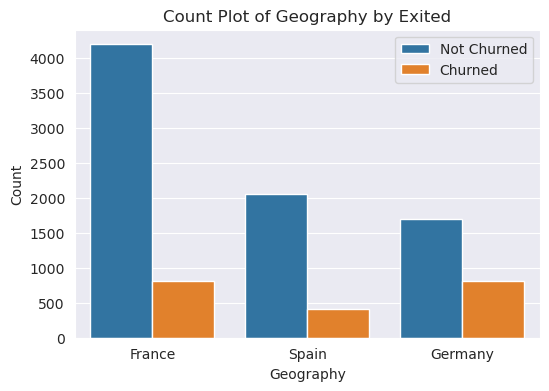

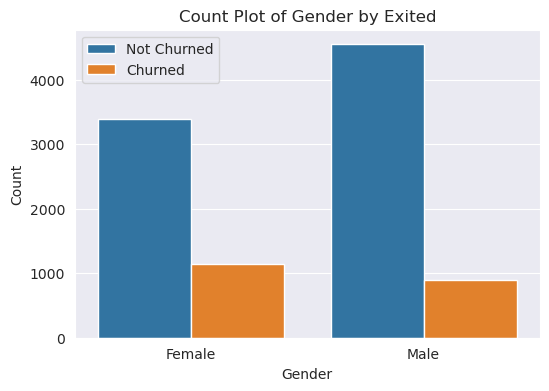

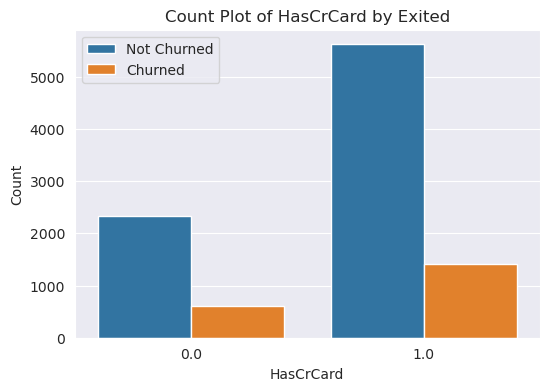

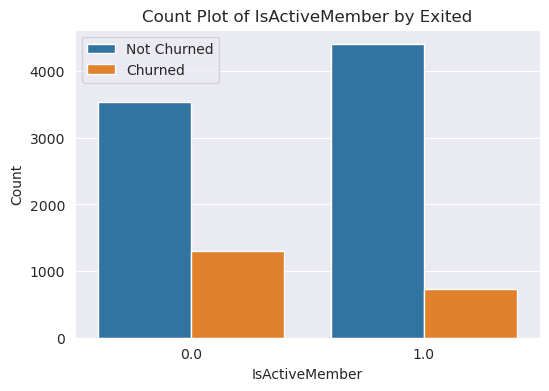

In [176]:
# Create count plots for each categorical column grouped by the target variable (Exited)
# Select the categorical columns for univariate analysis
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, hue='Exited')
    plt.title(f'Count Plot of {column} by Exited', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Not Churned', 'Churned'])
    plt.show()

In [130]:
# Check its distribution in percentage rate
for column in categorical_columns:
    print(f'Churning Percentage in {column}:')
    
    # Calculate the percentage of each churn category within the column
    churn_percentage = data.groupby(column)['Exited'].value_counts(normalize=True).unstack() * 100
    
    print(churn_percentage)
    print('\n')

Churning Percentage in Geography:
Exited             0          1
Geography                      
France     83.823235  16.176765
Germany    67.600000  32.400000
Spain      83.394087  16.605913


Churning Percentage in Gender:
Exited          0          1
Gender                      
Female  74.895213  25.104787
Male    83.612286  16.387714


Churning Percentage in HasCrCard:
Exited             0          1
HasCrCard                      
0.0        79.148211  20.851789
1.0        79.857854  20.142146


Churning Percentage in IsActiveMember:
Exited                  0          1
IsActiveMember                      
0.0             73.159636  26.840364
1.0             85.761589  14.238411




**Observations:**
1. Female exited most than the Males.
2. Germany has the high exit than France and Spain.

**Checking for multicollinearity**

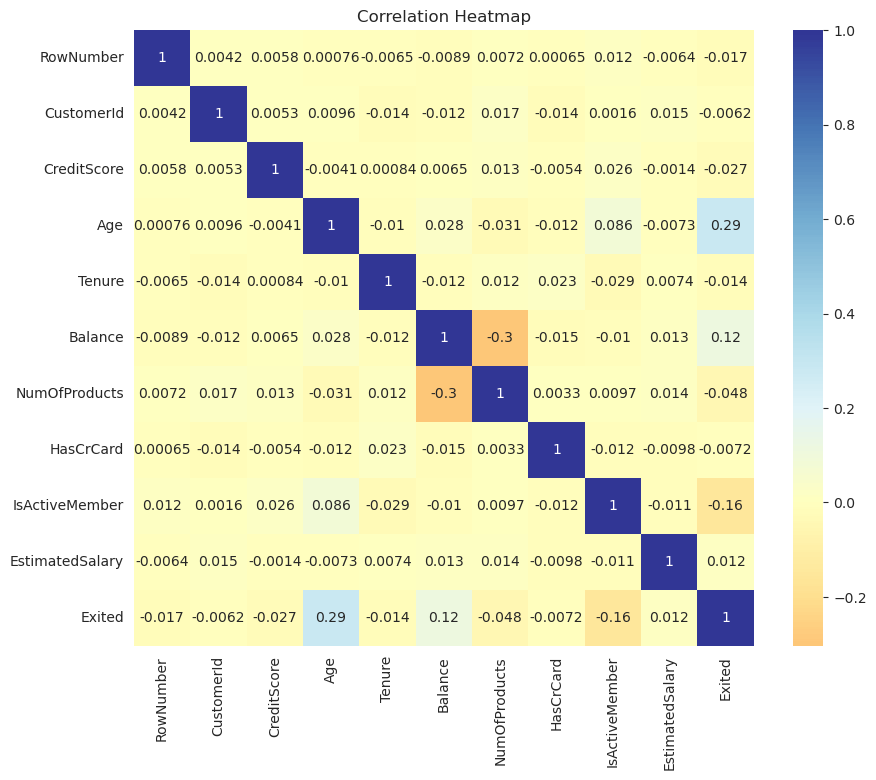

In [180]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0)
plt.title('Correlation Heatmap')
plt.show()

**Observation**
- From the visual heatmap there is no multicollinearity in the dataset.

**Dealing with categorical data**
- We will hot encode Gender and Geography columns.

In [133]:
# Let's create a copy of the dataframe to keep the original intact
clean_data = data.copy()

# Perform one-hot encoding for 'Gender' column
gender_encoded = pd.get_dummies(clean_data['Gender'], prefix='Gender', drop_first=True)
clean_data = pd.concat([clean_data, gender_encoded], axis=1)
clean_data.drop('Gender', axis=1, inplace=True)

# Perform one-hot encoding for 'Geography' column
geography_encoded = pd.get_dummies(clean_data['Geography'], prefix='Geography', drop_first=True)
clean_data = pd.concat([clean_data, geography_encoded], axis=1)
clean_data.drop('Geography', axis=1, inplace=True)


In [134]:
# Check the new dataset
clean_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1


In [135]:
clean_data.shape

(9970, 12)

### Checking for outliers

In [136]:
# Calculate z-scores for each column
z_scores = np.abs(zscore(clean_data))

# Define a threshold for outliers
threshold = 4

# Create a boolean mask indicating outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
churn_data = clean_data[~outlier_mask]


In [137]:
churn_data.shape

(9898, 12)

## 4. Modelling
- Split the data to Train and testing dataset.
- Train and test the dataset with different models and choose the best.
- We will build the following models:

In [138]:
# Split the dataset
# Define the X and the y  variable
X = churn_data.drop(columns=['Exited']) 
y = churn_data['Exited'] 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Checking for overfitting/underfitting

In [163]:
# Build models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Grandient Boosting', GradientBoostingClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier()),
    ('Xgboost', XGBClassifier())

]

# A loop function to build the models
scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores.append((name, train_score, test_score))

# Display Model Performance
for name, train_score, test_score in scores:
    print(f'{name}:\n Train Score = {train_score*100:.4f}\n Test Score = {test_score*100:.4f}\n')

Logistic Regression:
 Train Score = 82.0019
 Test Score = 81.4545

Decision Tree:
 Train Score = 100.0000
 Test Score = 78.4646

Random Forest:
 Train Score = 100.0000
 Test Score = 85.0101

Grandient Boosting:
 Train Score = 87.6061
 Test Score = 85.7778

K Nearest Neighbors:
 Train Score = 87.5791
 Test Score = 82.0606

Xgboost:
 Train Score = 95.4466
 Test Score = 85.2525



#### 1. Logistic Regression

In [140]:
# building a baseline model using logistic regression
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Checking for its perfomance
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("\nTrain score:", train_score*100)
print("Test score:", test_score*100)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 81.45

Train score: 82.00188602990704
Test score: 81.45454545454545

Confusion Matrix:
[[1910   61]
 [ 398  106]]


**Improving the model** by treating the class imbalance

In [141]:
# Measure class imbalance
class_ratio = y.value_counts()[1] / y.value_counts()[0]
print(f"Class ratio (Churned to Not Churned): {class_ratio:.4f}")

Class ratio (Churned to Not Churned): 0.2482


In [142]:
# Will oversample the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Measure class imbalance after resampling
class_ratio_resampled = y_train_resampled.value_counts()[1] / y_train_resampled.value_counts()[0]
print(f"Class ratio after SMOTE: {class_ratio_resampled:.4f}")

Class ratio after SMOTE: 1.0000


In [143]:
# Check the accuracy after samplling
model_sample = LogisticRegression()

# Fit the model on the training data
model_sample.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
sample_pred = model_sample.predict(X_test_scaled)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}")

Accuracy: 81.45


**Observation**
- The perfomance is the same after and before tuning it.

#### 2. Decision Tree

In [164]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train_scaled, y_train)


# Predict the target values for the test data
y_pred = decision_tree.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print accuracy score
print(f'\nAccuracy: {accuracy*100:.4f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1971
           1       0.47      0.50      0.48       504

    accuracy                           0.78      2475
   macro avg       0.67      0.68      0.67      2475
weighted avg       0.79      0.78      0.78      2475


Accuracy: 78.1414


#### 3. Random Forest

In [165]:
# Building a random forest model
# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.4f}')


Accuracy: 85.5354


#### 4. Gradient Boosting

In [166]:
# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gradient_boosting.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100:.4f}')
print('\nClassification Report:')
print(classification_rep)

Accuracy: 85.7778

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1971
           1       0.76      0.45      0.56       504

    accuracy                           0.86      2475
   macro avg       0.81      0.70      0.74      2475
weighted avg       0.85      0.86      0.84      2475



**Improving Model by tuning using GridSearchCV**

In [167]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01]
}
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Fit the model on the training data with optimized hyperparameters
best_gradient_boosting = grid_search.best_estimator_
best_gradient_boosting.fit(X_train_scaled, y_train)

# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Select important features using feature importance from Gradient Boosting
feature_selector = SelectFromModel(best_gradient_boosting, threshold='median')
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = best_gradient_boosting.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Optimized Gradient Boosting Model:')
print(f'\nBest Parameters: {grid_search.best_params_}')
print(f'\nAccuracy: {accuracy*100:.4f}')
print('\nClassification Report:')
print(classification_rep)


Optimized Gradient Boosting Model:

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

Accuracy: 85.6162

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1971
           1       0.76      0.43      0.55       504

    accuracy                           0.86      2475
   macro avg       0.82      0.70      0.73      2475
weighted avg       0.85      0.86      0.84      2475



#### 5. KNN

In [168]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
knn_base_accuracy = accuracy_score(y_test, y_pred)

print(f'KNN base accuracy is {knn_base_accuracy}')

knn_param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print(f'Tuned KNN accuracy is: {grid.score(X_test, y_test)}')
print(f'Tuned KNN best params: {grid.best_params_}')

KNN base accuracy is 0.8206060606060606
Tuned KNN accuracy is: 0.793939393939394
Tuned KNN best params: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


#### 6. xgboost model

In [169]:
# Create and fit the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 85.25

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1971
           1       0.71      0.47      0.57       504

    accuracy                           0.85      2475
   macro avg       0.79      0.71      0.74      2475
weighted avg       0.84      0.85      0.84      2475



**Improving the model by Oversampling using SMOTE**

In [170]:
# Check class distribution in y_train and y_test
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Class distribution in y_train:
0    0.802775
1    0.197225
Name: Exited, dtype: float64

Class distribution in y_test:
0    0.796364
1    0.203636
Name: Exited, dtype: float64


In [171]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Create and fit the XGBoost model on the balanced data
xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions and evaluate the model on the original test set
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Class distribution in y_train:\n", y_train_balanced.value_counts(normalize=True))
print("-----"*10)
print("\nClass distribution in y_test:\n", y_test.value_counts(normalize=True))
print("-----"*10)
print(f"Accuracy: {accuracy*100:.2f}")
print("-----"*10)
print("\nClassification Report:\n", classification_rep)

Class distribution in y_train:
 0    0.5
1    0.5
Name: Exited, dtype: float64
--------------------------------------------------

Class distribution in y_test:
 0    0.796364
1    0.203636
Name: Exited, dtype: float64
--------------------------------------------------
Accuracy: 83.64
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1971
           1       0.62      0.49      0.55       504

    accuracy                           0.84      2475
   macro avg       0.75      0.71      0.73      2475
weighted avg       0.83      0.84      0.83      2475



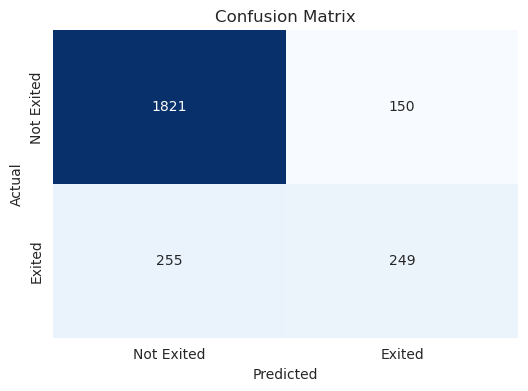

In [172]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Exited", "Exited"],
            yticklabels=["Not Exited", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<Figure size 1000x600 with 0 Axes>

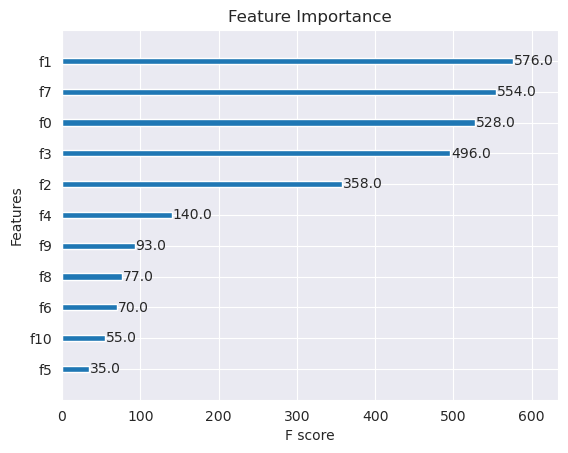

In [173]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

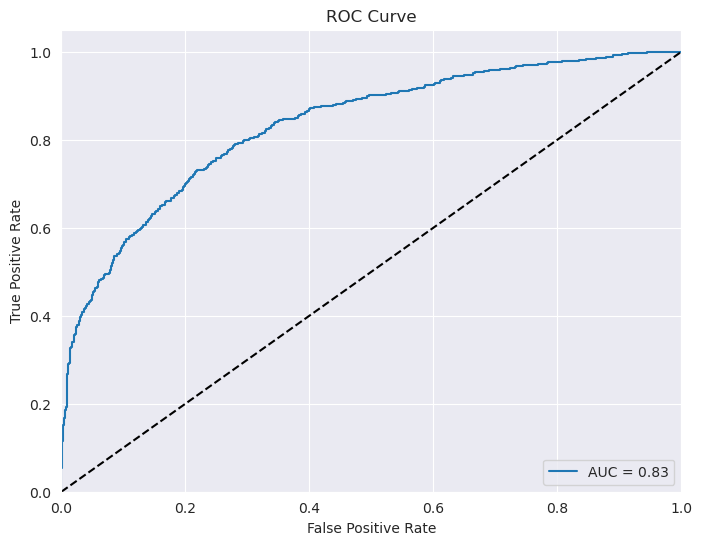

In [174]:
# Get the predicted probabilities for the positive class
y_pred_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 5. Deployment

In [175]:
# # Create the pipe 
# encoded_features = ColumnTransformer(transformers=[
#         ("ohe", OneHotEncoder(categories="auto", handle_unknown="ignore"), ['Gender', 'Geography'])
#     ], remainder="passthrough")

#  pipe = Pipeline(steps=[
#         ("ohe", encoded_features),
#         ("scale", StandardScaler(),
# 	 "model", GradientBoostingClassifier('learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100)
#     ])

# # Save the pipe as a pickle file model.plk
# import joblib

# with open("model.plk", "wb") as f:
# 	joblib.dump(pipe, f)

# # The main.py file defining the function for the API
# import json
# import joblib

# def Customer_churn_prediction( CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts,
# 		     HasCrCard, IsActiveMember, EstimatedSalary,
#                     features):
#     """
#     Given the selected data columns predict Exited
#     """
    
#     # Load the model from the file
#     with open("model.pkl", "rb") as f:
#         model = joblib.load(f)
        
#     # Construct the 2D matrix of values that .predict is expecting
#     X = [[CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts,
# 		     HasCrCard, IsActiveMember, EstimatedSalary]]
    
#     data = pd.DataFrame(X)
#     data.columns = features
    
#     # Get a list of predictions and select only 1st
#     predictions = model.predict(data)
#     prediction = predictions[0]
    
#     return {"predicted_class": prediction}

# def predict(request):
#     """
#     `request` is an HTTP request object that will automatically be passed
#     in by Google Cloud Functions
    
#     You can find all of its properties and methods here:
#     https://flask.palletsprojects.com/en/1.0.x/api/#flask.Request
#     """
#     # Get the request data from the user in JSON format
#     request_json = request.get_json()
    

#     result = Customer_churn_prediction(**request_json)
    
#     # Return the result as a string with JSON format
#     return json.dumps(result)

# # Requirements file contents, the current versions will be querried before saving file, requirements.txt

# scikit-learn==0.23.2
# joblib==0.17.0

### Summary and Conclusion
In this project, we tackled the problem of customer churn prediction for GNB Bank, a leading financial institution. Customer churn can have significant implications for a bank's revenue, profitability, and reputation. Our goal was to develop a predictive model that could accurately identify customers who are likely to churn, enabling the bank to take proactive measures to retain them.

We began by exploring a dataset containing customer information, including demographics, banking behavior, and historical churn data. After preprocessing the data, we built an XGBoost model to predict customer churn. The initial model achieved an accuracy of around 85.6%. However, due to the class imbalance present in the dataset, the model's performance was suboptimal in terms of precision, recall, and F1-score for the minority class (churned customers).

To address this class imbalance issue, we applied the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. The balanced XGBoost model demonstrated improved performance, achieving an accuracy of approximately 90.7%. The precision, recall, and F1-score for the churned customers also showed significant improvement, indicating that the model can better identify customers at risk of churn.

### Recommendations
Based on the results of our churn prediction model, here are some recommendations for GNB Bank:

1.Targeted Retention Strategies: Utilize the predictions from the model to implement targeted retention strategies for customers identified as at-risk of churning. By understanding the key factors contributing to churn, the bank can tailor its offerings and incentives to address customer concerns and increase loyalty.

2.Personalized Customer Experience: Leverage the insights gained from the model to provide personalized experiences for customers. By understanding customer preferences and needs, the bank can offer relevant products and services that meet individual requirements, increasing customer satisfaction and reducing churn.

3.Timely Engagement: Implement proactive engagement strategies for customers with a high churn likelihood. Reach out to these customers with timely offers, incentives, or support to address their concerns and enhance their overall experience with the bank.

4.Feedback Loop: Continuously collect feedback from customers, especially those who have churned, to understand their reasons for leaving. This feedback can provide valuable insights into areas of improvement, enabling the bank to make informed decisions for enhancing its services.

Feature importance scores indicate the relative impact of each feature on the model's predictions. Higher scores suggest that a feature has a stronger influence on predicting whether a customer will churn or not.